In [1]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt
import math
%matplotlib inline

# Pricing a European option using Black-Scholes formula and Monte Carlo simulations 
# Pricing a Barrier option using Monte Carlo simulations

S0 = 100     # spot price of the underlying stock today
K = 105      # strike at expiry
mu = 0.05    # expected return
sigma = 0.2  # volatility
r = 0.05     # risk-free rate
T = 1.0      # years to expiry
Sb = 110     # barrier


# Complete the following functions
def BS_european_price(S0, K, T, r, sigma):
  # --------- Insert your code here --------- #
    d1 = 1 / (sigma * np.sqrt(T)) * (np.log(S0 / K) + (r + sigma**2 / 2) * T)
    d2 = d1 - sigma * np.sqrt(T)
    c = norm.cdf(d1) * S0 - norm.cdf(d2) * K * np.exp(-r * T)
    p = norm.cdf(-d2) * K * np.exp(-r * T) - norm.cdf(-d1) * S0
    return c, p

def MC_european_price(S0, K, T, r, mu, sigma, numSteps, numPaths):
  # --------- Insert your code here --------- #
    paths = np.zeros((numSteps + 1, numPaths))
    dT = T / numSteps
    paths[0] = [S0] * numPaths 
    for iPath in range(numPaths):
        for iStep in range(numSteps):
            paths[iStep + 1, iPath] = paths[iStep, iPath] * np.exp((mu - 0.5 * sigma**2) * dT + sigma * np.sqrt(dT) * np.random.normal(0,1))
    CallPayoffT = np.maximum(paths[numSteps,:] - K,0)
    PutPayoffT = np.maximum(K - paths[numSteps,:], 0)
    c = np.mean(CallPayoffT) * np.exp(-r * T)
    p = np.mean(PutPayoffT) * np.exp(-r * T)
    return c, p, paths

def MC_barrier_knockin_price(S0, Sb, K, T, r, mu, sigma, numSteps, numPaths):
  # --------- Insert your code here --------- #
    paths = np.zeros((numSteps + 1, numPaths))
    dT = T / numSteps
    paths[0] = [S0] * numPaths 
    for iPath in range(numPaths):
        for iStep in range(numSteps):
            paths[iStep + 1, iPath] = paths[iStep, iPath] * np.exp((mu - 0.5 * sigma**2) * dT + sigma * np.sqrt(dT) * np.random.normal(0,1))
    
    knock_in = []
    for i in range(numPaths):
        if any(paths[:,i] > Sb):
            knock_in.append(1)
        else: 
            knock_in.append(0)  
    CallPayoffT = knock_in * np.maximum(paths[numSteps,:] - K,0)
    PutPayoffT = knock_in * np.maximum(K - paths[numSteps,:], 0)
    c = np.mean(CallPayoffT) * np.exp(-r * T)
    p = np.mean(PutPayoffT) * np.exp(-r * T)   
    
    return c, p

In [2]:
# Define variable numSteps to be the number of steps for multi-step MC
# numPaths - number of sample paths used in simulations

numSteps = 12;
numPaths = 100000;

# Implement your Black-Scholes pricing formula
call_BS_European_Price, putBS_European_Price = \
  BS_european_price(S0, K, T, r, sigma)

# Implement your one-step Monte Carlo pricing procedure for European option
callMC_European_Price_1_step, putMC_European_Price_1_step, MC_European_Price_1_step_paths = \
  MC_european_price(S0, K, T, r, mu, sigma, 1, numPaths)

# Implement your multi-step Monte Carlo pricing procedure for European option
callMC_European_Price_multi_step, putMC_European_Price_multi_step, MC_European_Price_multi_step_paths = \
  MC_european_price(S0, K, T, r, mu, sigma, numSteps, numPaths)

# Implement your one-step Monte Carlo pricing procedure for Barrier option
callMC_Barrier_Knockin_Price_1_step, putMC_Barrier_Knockin_Price_1_step = \
  MC_barrier_knockin_price(S0, Sb, K, T, r, mu, sigma, 1, numPaths)

# Implement your multi-step Monte Carlo pricing procedure for Barrier option
callMC_Barrier_Knockin_Price_multi_step, putMC_Barrier_Knockin_Price_multi_step = \
  MC_barrier_knockin_price(S0, Sb, K, T, r, mu, sigma, numSteps, numPaths)

# Implement your one-step Monte Carlo pricing procedure for Barrier option with volatility increased by 10% 
callMC_Barrier_Knockin_Price_1_step_increase, putMC_Barrier_Knockin_Price_1_step_increase = \
  MC_barrier_knockin_price(S0, Sb, K, T, r, mu, 1.1*sigma, 1, numPaths)

# Implement your one-step Monte Carlo pricing procedure for Barrier option with volatility decreased by 10% 
callMC_Barrier_Knockin_Price_1_step_decrease, putMC_Barrier_Knockin_Price_1_step_decrease = \
  MC_barrier_knockin_price(S0, Sb, K, T, r, mu, 0.9*sigma, 1, numPaths)

# Implement your multi-step Monte Carlo pricing procedure for Barrier option with volatility increased by 10% 
callMC_Barrier_Knockin_Price_multi_step_increase, putMC_Barrier_Knockin_Price_multi_step_increase = \
  MC_barrier_knockin_price(S0, Sb, K, T, r, mu, 1.1*sigma, numSteps, numPaths)

# Implement your multi-step Monte Carlo pricing procedure for Barrier option with volatility decreased by 10% 
callMC_Barrier_Knockin_Price_multi_step_decrease, putMC_Barrier_Knockin_Price_multi_step_decrease = \
  MC_barrier_knockin_price(S0, Sb, K, T, r, mu, 0.9*sigma, numSteps, numPaths)

print('Black-Scholes price of an European call option is ' + str(call_BS_European_Price))
print('Black-Scholes price of an European put option is ' + str(putBS_European_Price))
print('One-step MC price of an European call option is ' + str(callMC_European_Price_1_step)) 
print('One-step MC price of an European put option is ' + str(putMC_European_Price_1_step)) 
print('Multi-step MC price of an European call option is ' + str(callMC_European_Price_multi_step)) 
print('Multi-step MC price of an European put option is ' + str(putMC_European_Price_multi_step)) 
print('One-step MC price of an Barrier call option is ' + str(callMC_Barrier_Knockin_Price_1_step)) 
print('One-step MC price of an Barrier put option is ' + str(putMC_Barrier_Knockin_Price_1_step)) 
print('Multi-step MC price of an Barrier call option is ' + str(callMC_Barrier_Knockin_Price_multi_step)) 
print('Multi-step MC price of an Barrier put option is ' + str(putMC_Barrier_Knockin_Price_multi_step))
print('One-step MC price of an Barrier call option with volatility increased by 10% is ' + str(callMC_Barrier_Knockin_Price_1_step_increase)) 
print('One-step MC price of an Barrier put option with volatility increased by 10%is ' + str(putMC_Barrier_Knockin_Price_1_step_increase)) 
print('One-step MC price of an Barrier call option with volatility decreased by 10% is ' + str(callMC_Barrier_Knockin_Price_1_step_decrease)) 
print('One-step MC price of an Barrier put option with volatility decreased by 10%is ' + str(putMC_Barrier_Knockin_Price_1_step_decrease)) 
print('Multi-step MC price of an Barrier call option with volatility increased by 10% is ' + str(callMC_Barrier_Knockin_Price_multi_step_increase)) 
print('Multi-step MC price of an Barrier put option with volatility increased by 10% is ' + str(putMC_Barrier_Knockin_Price_multi_step_increase))
print('Multi-step MC price of an Barrier call option with volatility decreased by 10% is ' + str(callMC_Barrier_Knockin_Price_multi_step_decrease)) 
print('Multi-step MC price of an Barrier put option with volatility decreased by 10% is ' + str(putMC_Barrier_Knockin_Price_multi_step_decrease))

Black-Scholes price of an European call option is 8.021352235143176
Black-Scholes price of an European put option is 7.9004418077181455
One-step MC price of an European call option is 7.969269387686328
One-step MC price of an European put option is 7.872370949685984
Multi-step MC price of an European call option is 8.023308438041997
Multi-step MC price of an European put option is 7.888941870185496
One-step MC price of an Barrier call option is 7.810361106701125
One-step MC price of an Barrier put option is 0.0
Multi-step MC price of an Barrier call option is 7.902372446933945
Multi-step MC price of an Barrier put option is 1.2626706719150207
One-step MC price of an Barrier call option with volatility increased by 10% is 8.619678949566893
One-step MC price of an Barrier put option with volatility increased by 10%is 0.0
One-step MC price of an Barrier call option with volatility decreased by 10% is 6.991414647174465
One-step MC price of an Barrier put option with volatility decreased by

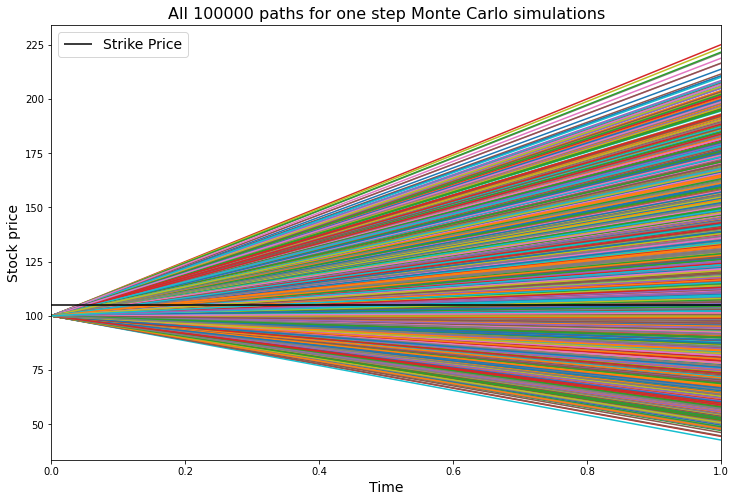

In [6]:
# Plot results
# --------- Insert your code here --------- #
plt.figure(figsize=(12,8))
plt.plot(MC_European_Price_1_step_paths)
plt.hlines(K, colors ="k", xmin=0,
           xmax=1,
           linestyle = 'solid',
           zorder=100,
           label="Strike Price")
plt.xlim((0,1))
plt.xlabel('Time', fontsize=14)
plt.ylabel('Stock price', fontsize=14)
plt.title('All 100000 paths for one step Monte Carlo simulations', fontsize=16)
plt.legend(loc="best", fontsize=14)
plt.show()

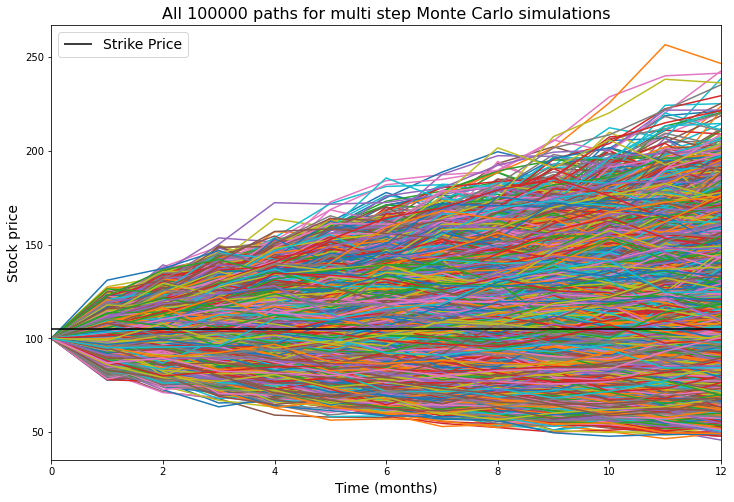

In [4]:
# Plot results
# --------- Insert your code here --------- #
plt.figure(figsize=(12,8))
plt.plot(MC_European_Price_multi_step_paths)
plt.hlines(K, colors ="k", xmin=0,
           xmax=numSteps,
           linestyle = 'solid',
           zorder=100,
           label="Strike Price")
plt.xlim((0, numSteps))
plt.xlabel('Time (months)', fontsize=14)
plt.ylabel('Stock price', fontsize=14)
plt.title('All 100000 paths for multi step Monte Carlo simulations', fontsize=16)
plt.legend(loc="best", fontsize=14)
plt.show()

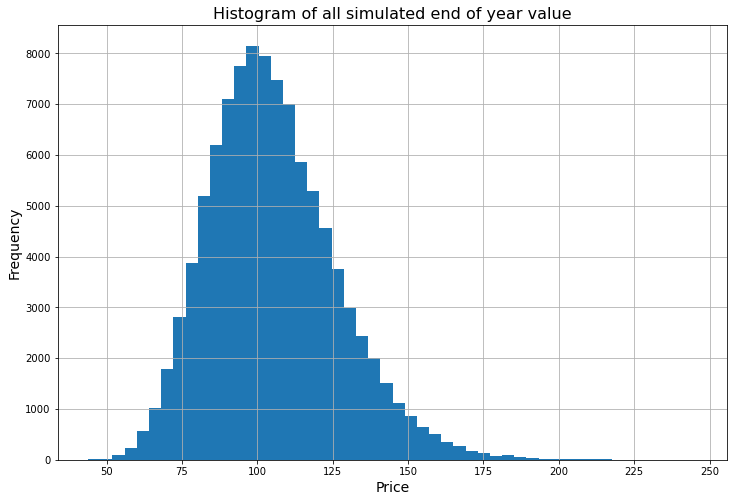

In [62]:
fig = plt.figure(figsize=(12,8))
plt.hist(MC_European_Price_multi_step_paths[numSteps,:], bins=50)
plt.title('Histogram of all simulated end of year value', fontsize=16)
plt.grid(True)
plt.xlabel('Price', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

In [168]:
# Strategies to obtain the same prices 
# Call option
paths_range = [100000, 1000000, 10000000]
steps_range = [1,12]

# Set threshold 
call_threshold = call_BS_European_Price
put_threshold = putBS_European_Price

for num_step in range(len(steps_range)): 
    for num_path in range(len(paths_range)): 
        callMC_European_Price_step_path, putMC_European_Price_step_path, MC_European_Price_step_path = \
        MC_european_price(S0, K, T, r, mu, sigma, steps_range[num_step], paths_range[num_path])
        
        if np.round(callMC_European_Price_step_path,2) == np.round(call_threshold,2): 
            call_optimal = callMC_European_Price_step_path
            path_optimal = paths_range[num_path]
            step_optimal = steps_range[num_step]
            break # break here
            

In [169]:
print('Call option optimal path:',(path_optimal))
print('Call option optimal step:',(step_optimal))
print('MC Call option price:',(call_optimal))

Call option optimal path: 100000
Call option optimal step: 12
MC Call option price: 8.02349687758332


In [178]:
# Put option 
for num_step in range(len(steps_range)): 
    for num_path in range(len(paths_range)): 
        callMC_European_Price_step_path, putMC_European_Price_step_path, MC_European_Price_step_path = \
        MC_european_price(S0, K, T, r, mu, sigma, steps_range[num_step], paths_range[num_path])
        
        if np.round(putMC_European_Price_step_path,2) == np.round(put_threshold,2): 
            put_optimal = putMC_European_Price_step_path
            path_optimal = paths_range[num_path]
            step_optimal = steps_range[num_step]
            break # break here

In [179]:
print('Put option optimal path:',(path_optimal))
print('Put option optimal step:',(step_optimal))
print('MC Put option price:',(put_optimal))

Put option optimal path: 1000000
Put option optimal step: 12
MC Put option price: 7.901477600976668
